In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
#生成数据
from sklearn.datasets.samples_generator import make_blobs

X,y_true = make_blobs(n_samples=400,centers=4,
                     cluster_std=0.60,random_state=0)
X = X[:,::-1]  #交换列是为了方便画图

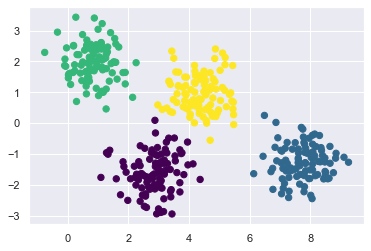

In [3]:
#用k-means标签画出数据
from sklearn.cluster import KMeans

kmeans = KMeans(4,random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis');

In [8]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans,X,n_clusters=4,rseed=0,ax=None):
    labels = kmeans.fit_predict(X)
    
    #画出输入数据
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis',zorder=2)
    
    #画出k-means模型的表示
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i],[center]).max() for i,center in enumerate(centers)]
    for c,r in zip(centers,radii):
        ax.add_patch(plt.Circle(c,r,fc='#CCCCCC',lw=3,alpha=.5,zorder=1))

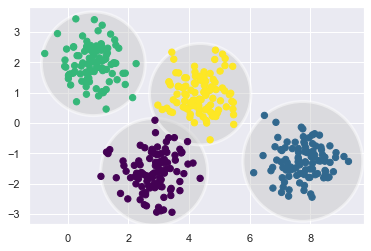

In [9]:
kmeans = KMeans(n_clusters=4,random_state=0)
plot_kmeans(kmeans,X)

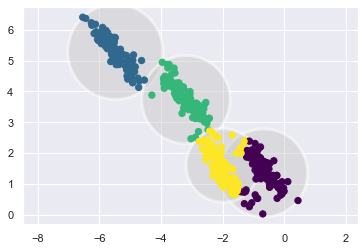

In [10]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X,rng.randn(2,2))

kmeans = KMeans(n_clusters=4,random_state=0)
plot_kmeans(kmeans,X_stretched)

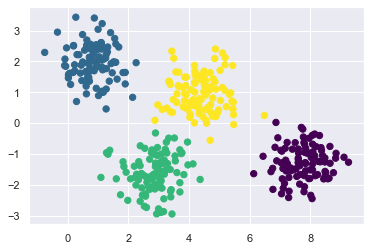

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis');

In [12]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.469 0.    0.    0.531]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


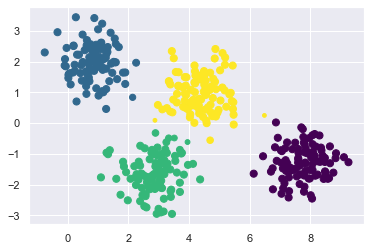

In [13]:
size = 50 * probs.max(1) ** 2  #平方强调差异
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis',s=size);

In [30]:
from matplotlib.patches import Ellipse

def draw_ellipse(position,covariance,ax=None,**kwargs):
    """用给定的位置和协方差画一个椭圆"""
    ax = ax or plt.gca()
    
    #将协方差转换成主轴
    if covariance.shape == (2,2):
        U,s,Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0],U[0,0]))
        width,height = 2 * np.sqrt(s)
    else:
        angle = 0
        width,height = 2 * np.sqrt(covariance)
        
    #画出椭圆
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position,nsig * width,nsig * height,angle,**kwargs))
        
def plot_gmm(gmm,X,label=True,ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis',zorder=2)
    else:
        ax.scatter(X[:,0],X[:,1],s=40,zorder=2)
        
    ax.axis('equal')
    
    w_factor = .2 / gmm.weights_.max()
    for pos,covar,w in zip(gmm.means_,gmm.covariances_ ,gmm.weights_):
        draw_ellipse(pos,covar,alpha=w * w_factor)

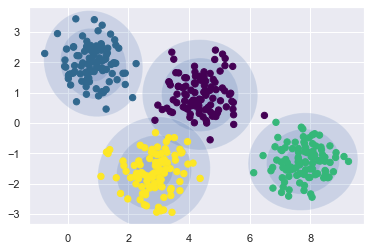

In [31]:
gmm = GaussianMixture(n_components=4,random_state=42)
plot_gmm(gmm,X)

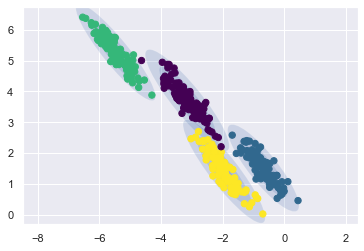

In [32]:
gmm = GaussianMixture(n_components=4,covariance_type='full',random_state=42)
plot_gmm(gmm,X_stretched)

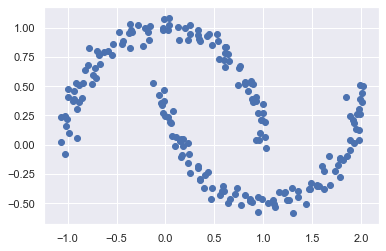

In [33]:
from sklearn.datasets import make_moons

Xmoon,ymoon = make_moons(200,noise=.05,random_state=0)
plt.scatter(Xmoon[:,0],Xmoon[:,1]);

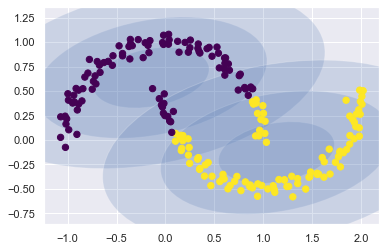

In [34]:
gmm2 = GaussianMixture(n_components=2,covariance_type='full',random_state=0)
plot_gmm(gmm2,Xmoon)

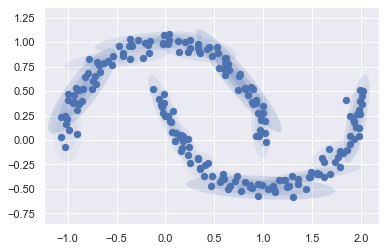

In [36]:
gmm16 = GaussianMixture(n_components=16,covariance_type='full',random_state=0)
plot_gmm(gmm16,Xmoon,label=False)

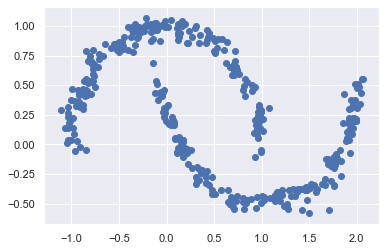

In [46]:
Xnew,ynew = gmm16.sample(400)
plt.scatter(Xnew[:,0],Xnew[:,1]);

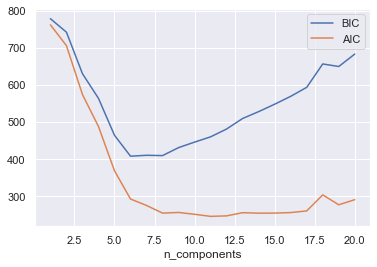

In [47]:
n_components = np.arange(1,21)
models = [GaussianMixture(n,covariance_type='full',random_state=0).fit(Xmoon) for n in n_components]

plt.plot(n_components,[m.bic(Xmoon) for m in models],label='BIC')
plt.plot(n_components,[m.aic(Xmoon) for m in models],label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [48]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

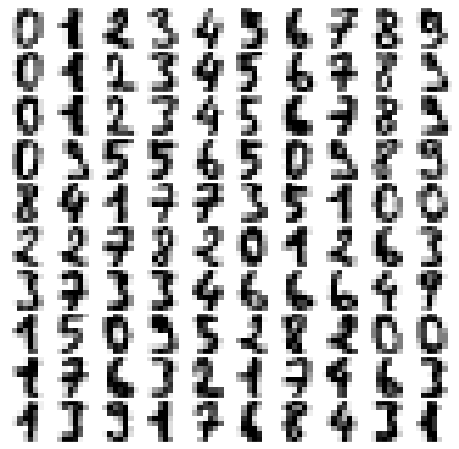

In [49]:
def plot_digits(data):
    fig,ax = plt.subplots(10,10,figsize=(8,8),
                         subplot_kw=dict(xticks=[],yticks=[]))
    fig.subplots_adjust(hspace=.05,wspace=.05)
    for i ,axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8,8),cmap='binary')
        im.set_clim(0,16)
        
plot_digits(digits.data)

In [50]:
from sklearn.decomposition import PCA

pca = PCA(.99,whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

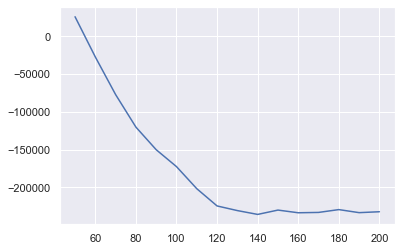

In [51]:
n_components = np.arange(50,210,10)
models = [GaussianMixture(n,covariance_type='full',random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components,aics);

In [52]:
gmm = GaussianMixture(140,covariance_type='full',random_state=0)
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=140, n_init=1,
                precisions_init=None, random_state=0, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [53]:
print(gmm.converged_)

True


In [56]:
data_X,data_y = gmm.sample(100)
data_X.shape

(100, 41)

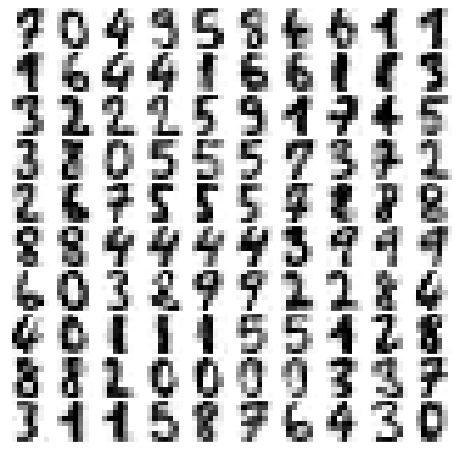

In [57]:
digits_new = pca.inverse_transform(data_X)
plot_digits(digits_new)